In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import netCDF4 as nc
import get_magna_gem as gmg
import fnmatch
import os
import kuka_utils as u
from datetime import datetime
from datetime import timedelta
import sys
from matplotlib.pyplot import cm
from scipy.stats import linregress
import matplotlib.gridspec as gridspec
from scipy import stats



In [9]:
file_path = '/Volumes/bigLacie/processed_stare_cs2_alt_new_nrcs/'
date = '20191107'
b = 'Ku'
x_y_p = pickle.load( open('/Volumes/bigLacie/processed_stare_cs2_alt_new_nrcs/'  + '/x_y_p/x_y_p_'+date+'_'+b+'.p', "rb" ) )
print(x_y_p['range'][1] - x_y_p['range'][0])
b = 'Ka'
x_y_p = pickle.load( open('/Volumes/bigLacie/processed_stare_cs2_alt_new_nrcs/'  + '/x_y_p/x_y_p_'+date+'_'+b+'.p', "rb" ) )
print(x_y_p['range'][1] - x_y_p['range'][0])

0.00762939453125
0.00457763671875


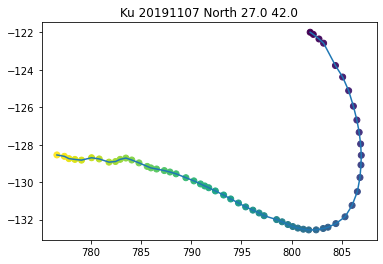

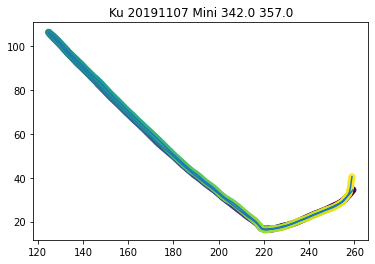

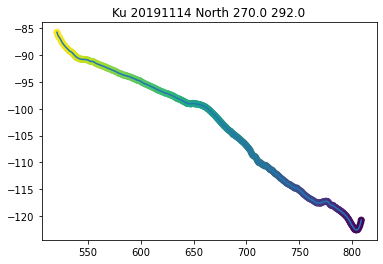

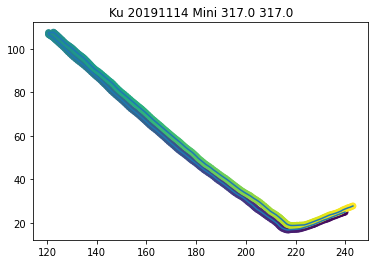

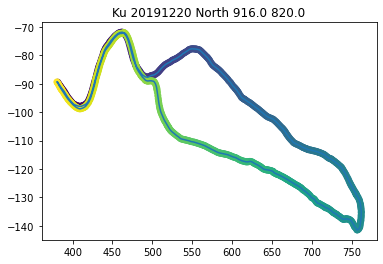

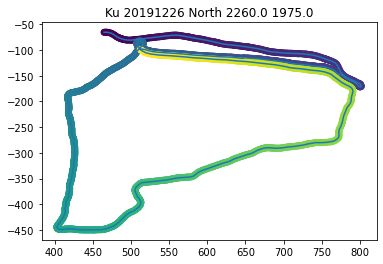

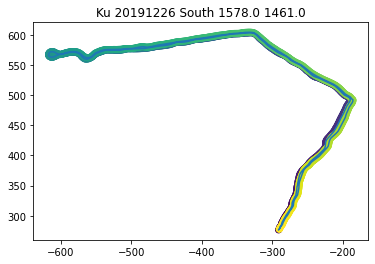

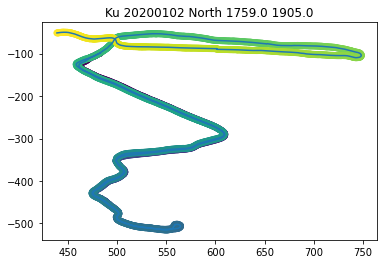

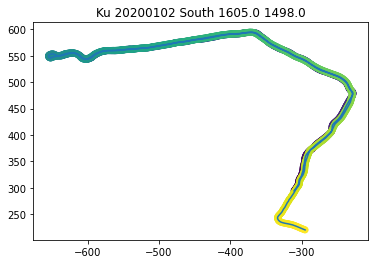

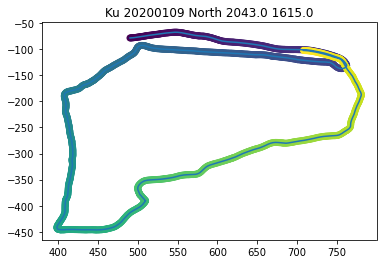

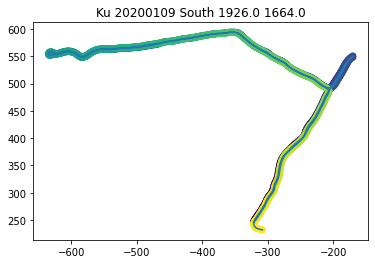

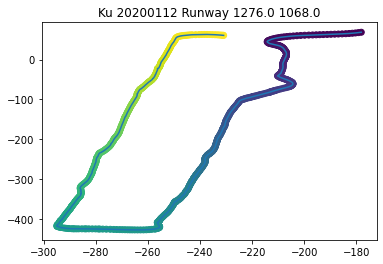

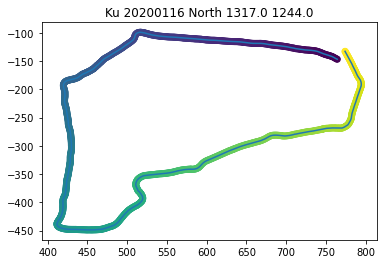

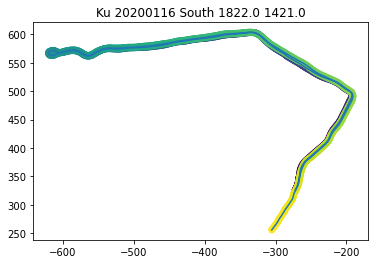

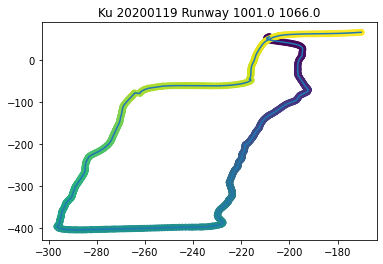

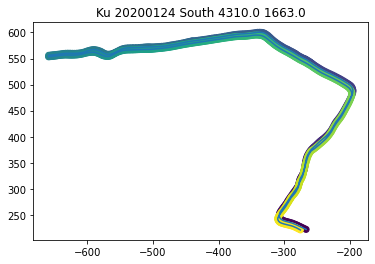

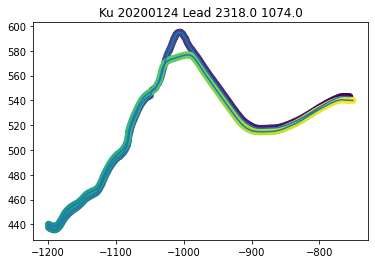

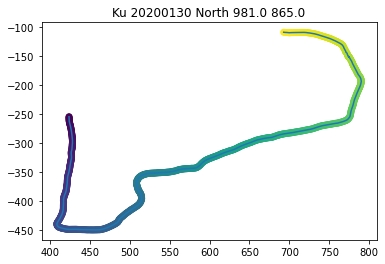

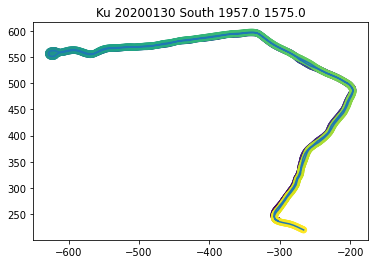

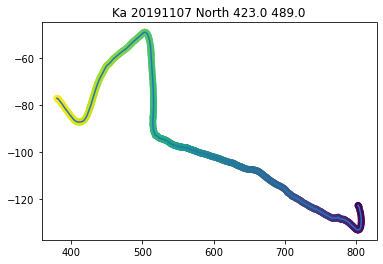

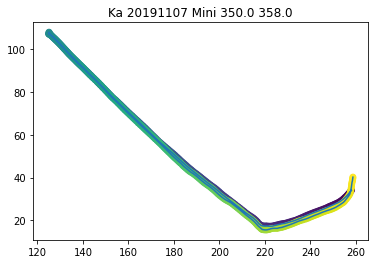

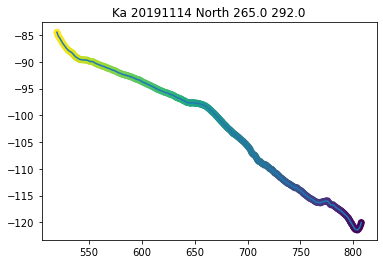

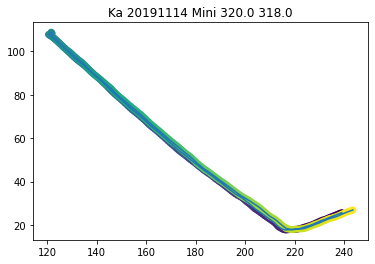

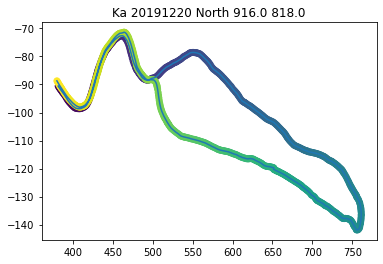

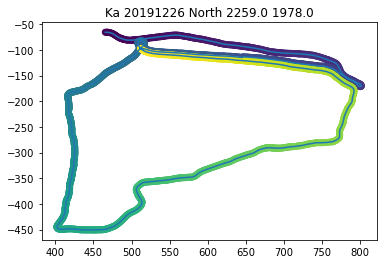

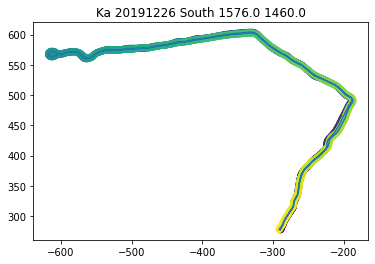

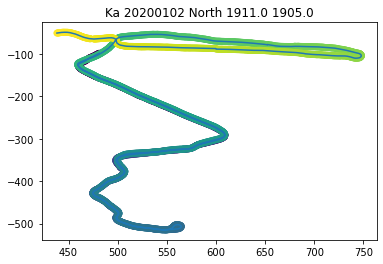

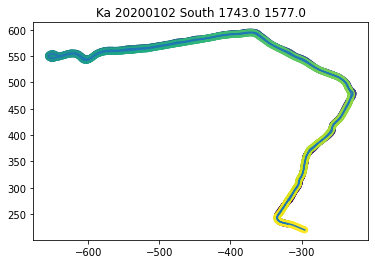

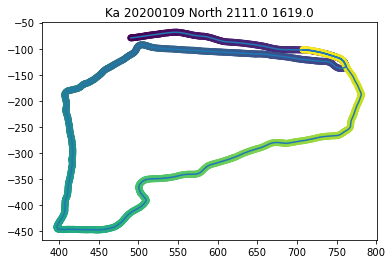

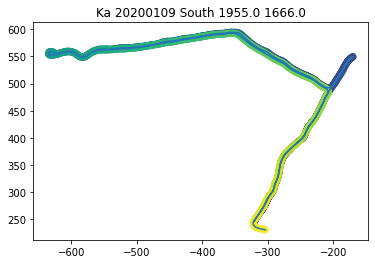

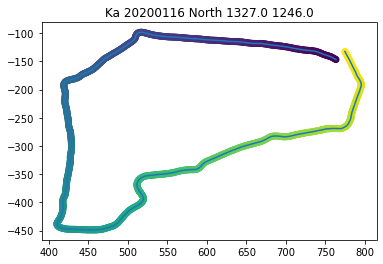

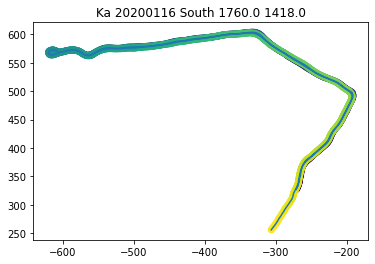

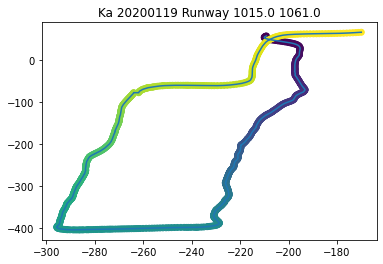

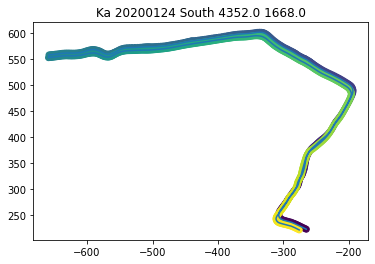

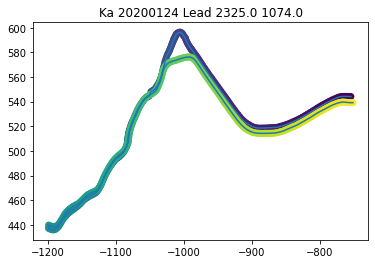

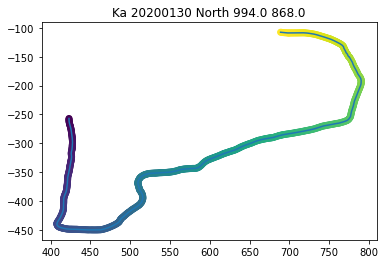

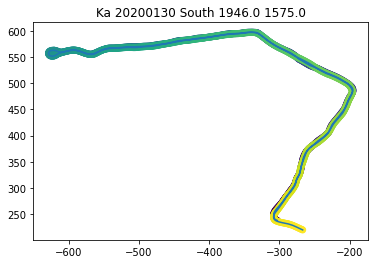

In [44]:
date_list = [
             '20191107',
            '20191114',
            '20191220',
            '20191226',
            '20200102',
            '20200107',
            '20200109',
            '20200112',
            '20200116',
            '20200119',
            '20200123',
            '20200124',
            '20200129',
            '20200130', 
            ]

areas = u.areas()
band = ['Ku', 'Ka']
area_list = [keys for keys in areas]

for b in band:
    
    for date in date_list:
        
        file = 'x_y_p_'+date+'_'+b+'.p'
        if (len(fnmatch.filter(os.listdir('/Volumes/bigLacie/processed_stare_new_nrcs/x_y_p/'), file))) == 1:
            
            x_y_p = pickle.load( open('/Volumes/bigLacie/processed_stare_new_nrcs/'  + '/x_y_p/x_y_p_'+date+'_'+b+'.p', "rb" ) )
            
            index = u.index_areas(x_y_p['x'], x_y_p['y'])

            for a in areas:
                 if len(index[a]) > 0:
                    dist, moving = u.remove_static(np.array(x_y_p['x'])[index[a]], 
                                                   np.array(x_y_p['y'])[index[a]], 
                                                   cutoff = .1)
                    
                    x = np.array(x_y_p['x'])[index[a]][moving]
                    y = np.array(x_y_p['y'])[index[a]][moving]
                    
                    plt.scatter(x, y, c = np.arange(len(x)))
                    plt.plot(x,y)
#                     tot = np.sqrt(np.sum((x - np.roll(x,1))**2 + (y - np.roll(y,1))**2))
                    tot = sum(np.sqrt((x - np.roll(x,1))**2 + (y - np.roll(y,1))**2)[1:])
                    plt.title(b + ' ' + date + ' ' + a + ' ' + 
                              str(round(np.sum(dist), 0))+ ' ' + str(round(tot, 0)) )
                    plt.show()
#                     print(b, date, a, dist)
#                     print(b, date, a, np.sum(dist))


In [16]:
# for b in band:
    
#     for date in date_list:
        
#         file = 'x_y_p_'+date+'_'+b+'.p'
#         if (len(fnmatch.filter(os.listdir('/Volumes/bigLacie/processed_stare_new_nrcs/x_y_p/'), file))) == 1:
            
#             x_y_p = pickle.load( open('/Volumes/bigLacie/processed_stare_new_nrcs/'  + '/x_y_p/x_y_p_'+date+'_'+b+'.p', "rb" ) )
            
#             index = u.index_areas(x_y_p['x'], x_y_p['y'])

#             for a in areas:
#                  if len(index[a]) > 0:
#                     dist, moving = u.remove_static(np.array(x_y_p['x'])[index[a]], 
#                                                    np.array(x_y_p['y'])[index[a]], 
#                                                    cutoff = .05)
                    
#                     x = np.array(x_y_p['x'])[index[a]][moving]
#                     y = np.array(x_y_p['y'])[index[a]][moving]
#                     print(b, date, a, np.sum(dist))


Ku 20191107 North 27.376104241296375
Ku 20191107 Mini 342.259115834848
Ku 20191114 North 269.5502838855066
Ku 20191114 Mini 316.77502964224897
Ku 20191220 North 915.9524765437486
Ku 20191226 North 2259.914149570347
Ku 20191226 South 1578.4303619289633
Ku 20200102 North 1759.135197626229
Ku 20200102 South 1604.8576465052554
Ku 20200109 North 2042.9368267448187
Ku 20200109 South 1925.6020500749528
Ku 20200112 Runway 1275.8389089232173
Ku 20200116 North 1316.6427827825305
Ku 20200116 South 1822.334257141286
Ku 20200119 Runway 1001.3925086739852
Ku 20200124 South 4309.8062062738545
Ku 20200124 Lead 2317.715531559686
Ku 20200130 North 980.5965290650098
Ku 20200130 South 1957.418125236548
Ka 20191107 North 423.4579838236134
Ka 20191107 Mini 349.65112614929893
Ka 20191114 North 265.48178331278757
Ka 20191114 Mini 319.77900992539946
Ka 20191220 North 916.1801555627674


KeyboardInterrupt: 